In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [2]:
with open('test_df') as f:
    test_df=pd.read_csv(f)

In [3]:
X_test, y_test = test_df.drop('Cancer',axis=1), test_df.Cancer

## NB Failure Analysis

In [4]:
nb = pickle.load(open('nb_model.pkl','rb'))

In [5]:
y_pred=nb.predict(X_test)
test_df['y_pred'] = y_pred

In [6]:
nb_false_preds=test_df[((test_df.Cancer==0) & (test_df.y_pred==1)) | ((test_df.Cancer==1) & (test_df.y_pred==0))]
nb_false_preds.head(20)

,Gender,Age Group,Num of Bad Mental Health Days,Could Afford Doctor,Years Since Last Checkup,Exercise in Past 30 Days,Hours of Sleeping,Heart Attack,Heart Disease,Stroke,Asthma,Depression,Kidney Disease,Arthritis,Diabetes,Married,Deaf,Blind,Smoked 100,Smokeless Tobacco,Age Started Smoking,Cigarettes per Day,Days Drinking,Flu Vaccine,Pneumonia Vaccine,Tetanus Last 10 Years,Had COVID,Metropolitan,Income,Insulin,BMI,Ethnicity_American Indian and Alaskan Native,Ethnicity_Asian and Pacific Islander,Ethnicity_Black,Ethnicity_Hispanic,"Ethnicity_Multiracial, non-Hispanic",Ethnicity_White,Education_attended_college,Education_did_not_graduate_high_school,Education_graduated_college,Education_graduated_high_school,Cancer,y_pred
0,1.0,11.000000,0.0,0.000000,1.000000,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,20.000000,10.000000,0.233333,1.000000,1.000000,1.000000,0.000000,0.0,7.000000,0.321402,37.699460,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,13.000000,30.0,0.000000,1.000000,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,18.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,5.000000,0.318236,17.003494,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,1.0,1.000000,14.0,0.000000,1.000000,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,21.000000,2.000000,0.700000,0.000000,0.000000,1.000000,1.000000,1.0,7.000000,0.000000,26.245333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
10,1.0,9.000000,0.0,0.000000,3.000000,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,17.000000,30.000000,0.233333,1.000000,1.000000,0.000000,0.000000,0.0,7.000000,0.000000,30.376543,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
13,1.0,9.004374,0.0,0.000000,1.000000,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,19.000000,10.000000,0.000000,0.000000,0.000000,0.680984,0.000000,1.0,8.518290,0.000000,32.979921,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
18,1.0,11.000000,0.0,0.000000,1.000000,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,9.000000,0.000000,34.309221,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
19,0.0,12.000000,0.0,0.000000,1.000000,1.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,7.000000,0.000000,29.283252,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20,1.0,10.000000,0.0,0.000000,1.000000,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,25.000000,2.000000,1.400000,1.000000,0.000000,1.000000,0.000000,1.0,3.000000,0.000000,26.259805,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
21,1.0,6.000000,3.0,0.000000,1.000000,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,20.000000,13.692544,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,9.000000,0.000000,21.697531,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
22,0.0,11.000000,0.0,0.000000,1.000000,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.0,11.000000,0.000000,22.462722,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [7]:
feats = ['Ethnicity_American Indian and Alaskan Native','Ethnicity_Asian and Pacific Islander', 'Ethnicity_Black',
       'Ethnicity_Hispanic', 'Ethnicity_Multiracial, non-Hispanic','Ethnicity_White']
nb_perc=nb_false_preds[feats].mean(axis=0) 
test_perc=X_test[feats].mean(axis=0)
nb_perc, test_perc

(Ethnicity_American Indian and Alaskan Native    0.014940
 Ethnicity_Asian and Pacific Islander            0.019618
 Ethnicity_Black                                 0.077666
 Ethnicity_Hispanic                              0.059759
 Ethnicity_Multiracial, non-Hispanic             0.014286
 Ethnicity_White                                 0.781237
 dtype: float64,
 Ethnicity_American Indian and Alaskan Native    0.015405
 Ethnicity_Asian and Pacific Islander            0.035463
 Ethnicity_Black                                 0.077882
 Ethnicity_Hispanic                              0.095320
 Ethnicity_Multiracial, non-Hispanic             0.020058
 Ethnicity_White                                 0.724408
 dtype: float64)

## SGDC Failure Analysis

In [8]:
sgdc = pickle.load(open('sgdc_model.pkl','rb'))

In [9]:
y_pred=sgdc.predict(X_test)
test_df['y_pred'] = y_pred

In [10]:
sgdc_false_preds=test_df[((test_df.Cancer==0) & (test_df.y_pred==1)) | ((test_df.Cancer==1) & (test_df.y_pred==0))]
sgdc_false_preds.head(35)

,Gender,Age Group,Num of Bad Mental Health Days,Could Afford Doctor,Years Since Last Checkup,Exercise in Past 30 Days,Hours of Sleeping,Heart Attack,Heart Disease,Stroke,Asthma,Depression,Kidney Disease,Arthritis,Diabetes,Married,Deaf,Blind,Smoked 100,Smokeless Tobacco,Age Started Smoking,Cigarettes per Day,Days Drinking,Flu Vaccine,Pneumonia Vaccine,Tetanus Last 10 Years,Had COVID,Metropolitan,Income,Insulin,BMI,Ethnicity_American Indian and Alaskan Native,Ethnicity_Asian and Pacific Islander,Ethnicity_Black,Ethnicity_Hispanic,"Ethnicity_Multiracial, non-Hispanic",Ethnicity_White,Education_attended_college,Education_did_not_graduate_high_school,Education_graduated_college,Education_graduated_high_school,Cancer,y_pred
0,1.0,11.000000,0.000000,0.0,1.000000,0.0,7.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,1.0,1.0,0.00000,0.000000,1.000000,1.000000,20.000000,10.000000,0.233333,1.000000,1.000000,1.000000,0.000000,0.0,7.000000,0.321402,37.699460,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,9.000000,0.000000,1.0,3.000000,0.0,5.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.00000,1.000000,1.000000,1.000000,24.000000,10.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.0,5.091082,0.000000,24.689126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,13.000000,30.000000,0.0,1.000000,1.0,8.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.00000,0.000000,1.000000,1.000000,18.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,5.000000,0.318236,17.003494,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,1.0,8.000000,0.000000,0.0,1.000000,1.0,6.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0,9.000000,0.000000,22.237755,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9,1.0,1.000000,14.000000,0.0,1.000000,1.0,7.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.00000,0.000000,1.000000,1.000000,21.000000,2.000000,0.700000,0.000000,0.000000,1.000000,1.000000,1.0,7.000000,0.000000,26.245333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
10,1.0,9.000000,0.000000,0.0,3.000000,1.0,7.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.00000,0.000000,1.000000,1.000000,17.000000,30.000000,0.233333,1.000000,1.000000,0.000000,0.000000,0.0,7.000000,0.000000,30.376543,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
13,1.0,9.004374,0.000000,0.0,1.000000,1.0,5.0,0.0,1.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.00000,0.000000,1.000000,1.000000,19.000000,10.000000,0.000000,0.000000,0.000000,0.680984,0.000000,1.0,8.518290,0.000000,32.979921,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
18,1.0,11.000000,0.000000,0.0,1.000000,1.0,8.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,9.000000,0.000000,34.309221,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
19,0.0,12.000000,0.000000,0.0,1.000000,1.0,8.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,7.000000,0.000000,29.283252,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20,1.0,10.000000,0.000000,0.0,1.000000,1.0,8.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.00000,0.000000,1.000000,1.000000,25.000000,2.000000,1.400000,1.000000,0.000000,1.000000,0.000000,1.0,3.000000,0.000000,26.259805,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [11]:
sgdc_perc=sgdc_false_preds[feats].mean(axis=0) 
sgdc_perc, test_perc

(Ethnicity_American Indian and Alaskan Native    0.014801
 Ethnicity_Asian and Pacific Islander            0.020011
 Ethnicity_Black                                 0.079653
 Ethnicity_Hispanic                              0.060373
 Ethnicity_Multiracial, non-Hispanic             0.014606
 Ethnicity_White                                 0.778422
 dtype: float64,
 Ethnicity_American Indian and Alaskan Native    0.015405
 Ethnicity_Asian and Pacific Islander            0.035463
 Ethnicity_Black                                 0.077882
 Ethnicity_Hispanic                              0.095320
 Ethnicity_Multiracial, non-Hispanic             0.020058
 Ethnicity_White                                 0.724408
 dtype: float64)

## RFC Failure Analysis

In [12]:
rfc = pickle.load(open('rfc_model.pkl','rb'))

In [13]:
y_pred=rfc.predict(X_test)
test_df['y_pred'] = y_pred

In [14]:
rfc_false_preds=test_df[((test_df.Cancer==0) & (test_df.y_pred==1)) | ((test_df.Cancer==1) & (test_df.y_pred==0))]
rfc_false_preds.head(20)

,Gender,Age Group,Num of Bad Mental Health Days,Could Afford Doctor,Years Since Last Checkup,Exercise in Past 30 Days,Hours of Sleeping,Heart Attack,Heart Disease,Stroke,Asthma,Depression,Kidney Disease,Arthritis,Diabetes,Married,Deaf,Blind,Smoked 100,Smokeless Tobacco,Age Started Smoking,Cigarettes per Day,Days Drinking,Flu Vaccine,Pneumonia Vaccine,Tetanus Last 10 Years,Had COVID,Metropolitan,Income,Insulin,BMI,Ethnicity_American Indian and Alaskan Native,Ethnicity_Asian and Pacific Islander,Ethnicity_Black,Ethnicity_Hispanic,"Ethnicity_Multiracial, non-Hispanic",Ethnicity_White,Education_attended_college,Education_did_not_graduate_high_school,Education_graduated_college,Education_graduated_high_school,Cancer,y_pred
0,1.0,11.000000,0.0,0.0,1.000000,0.0,7.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,1.0,1.0,0.00000,0.000000,1.000000,1.000000,20.000000,10.000000,0.233333,1.000000,1.000000,1.000000,0.000000,0.0,7.000000,0.321402,37.699460,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,9.000000,0.0,1.0,3.000000,0.0,5.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.00000,1.000000,1.000000,1.000000,24.000000,10.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.0,5.091082,0.000000,24.689126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,13.000000,30.0,0.0,1.000000,1.0,8.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.00000,0.000000,1.000000,1.000000,18.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,5.000000,0.318236,17.003494,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,1.0,1.000000,14.0,0.0,1.000000,1.0,7.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.00000,0.000000,1.000000,1.000000,21.000000,2.000000,0.700000,0.000000,0.000000,1.000000,1.000000,1.0,7.000000,0.000000,26.245333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
10,1.0,9.000000,0.0,0.0,3.000000,1.0,7.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.00000,0.000000,1.000000,1.000000,17.000000,30.000000,0.233333,1.000000,1.000000,0.000000,0.000000,0.0,7.000000,0.000000,30.376543,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
13,1.0,9.004374,0.0,0.0,1.000000,1.0,5.0,0.0,1.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.00000,0.000000,1.000000,1.000000,19.000000,10.000000,0.000000,0.000000,0.000000,0.680984,0.000000,1.0,8.518290,0.000000,32.979921,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
18,1.0,11.000000,0.0,0.0,1.000000,1.0,8.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,9.000000,0.000000,34.309221,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
19,0.0,12.000000,0.0,0.0,1.000000,1.0,8.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,7.000000,0.000000,29.283252,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20,1.0,10.000000,0.0,0.0,1.000000,1.0,8.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.00000,0.000000,1.000000,1.000000,25.000000,2.000000,1.400000,1.000000,0.000000,1.000000,0.000000,1.0,3.000000,0.000000,26.259805,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
22,0.0,11.000000,0.0,0.0,1.000000,1.0,8.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.0,11.000000,0.000000,22.462722,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [15]:
rfc_perc=rfc_false_preds[feats].mean(axis=0) 
rfc_perc, test_perc

(Ethnicity_American Indian and Alaskan Native    0.013551
 Ethnicity_Asian and Pacific Islander            0.018690
 Ethnicity_Black                                 0.076105
 Ethnicity_Hispanic                              0.052217
 Ethnicity_Multiracial, non-Hispanic             0.013667
 Ethnicity_White                                 0.792652
 dtype: float64,
 Ethnicity_American Indian and Alaskan Native    0.015405
 Ethnicity_Asian and Pacific Islander            0.035463
 Ethnicity_Black                                 0.077882
 Ethnicity_Hispanic                              0.095320
 Ethnicity_Multiracial, non-Hispanic             0.020058
 Ethnicity_White                                 0.724408
 dtype: float64)

# Visualization

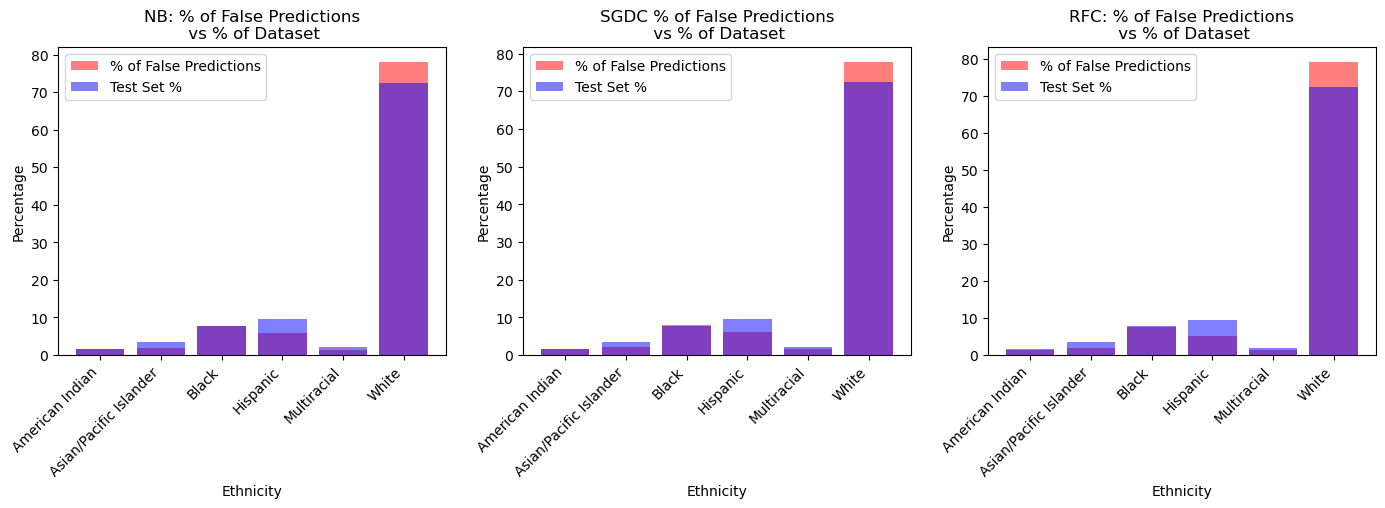

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(17,4))
labels = ['American Indian','Asian/Pacific Islander','Black',
       'Hispanic','Multiracial','White']
index = 0
model_performances=[nb_perc,sgdc_perc,rfc_perc]
titles=['NB: % of False Predictions\n vs % of Dataset','SGDC % of False Predictions\n vs % of Dataset','RFC: % of False Predictions\n vs % of Dataset']

for i in range(3):
    axs[i].bar(np.arange(6),model_performances[i].values*100, color = 'red',alpha=.5)
    axs[i].bar(np.arange(6), test_perc*100, color='blue',alpha=.5)
    axs[i].set_xlabel('Ethnicity')
    axs[i].set_ylabel('Percentage')
    axs[i].legend(['% of False Predictions','Test Set %'])
    axs[i].set_xticks([0,1,2,3,4,5],labels)
    axs[i].set_xticklabels(labels,rotation=45, ha='right')
    axs[i].set_title(titles[i])
    index+=1
plt.savefig('Failure_analysis', bbox_inches='tight')

## Analysis on Gender

In [20]:
nb_perc_gender=nb_false_preds['Gender'].mean(axis=0) 
sgdc_perc_gender=sgdc_false_preds['Gender'].mean(axis=0) 
rfc_perc_gender=rfc_false_preds['Gender'].mean(axis=0) 
test_perc_gender=X_test['Gender'].mean(axis=0)

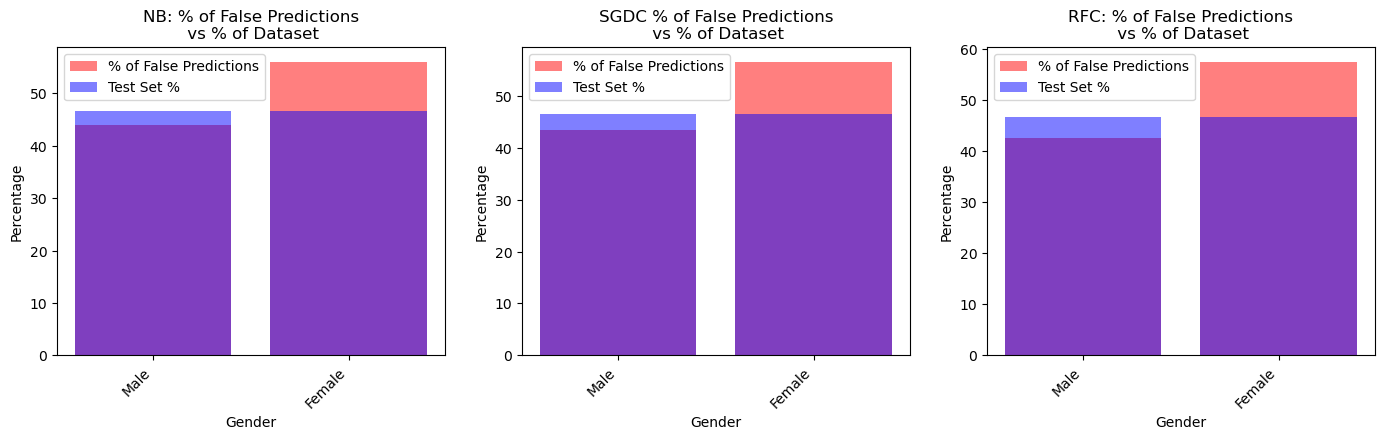

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(17,4))
labels = ['Male','Female']
index = 0
model_performances=[nb_perc_gender,sgdc_perc_gender,rfc_perc_gender]
titles=['NB: % of False Predictions\n vs % of Dataset','SGDC % of False Predictions\n vs % of Dataset','RFC: % of False Predictions\n vs % of Dataset']

for i in range(3):
    axs[i].bar(np.arange(2),[model_performances[i]*100,100-model_performances[i]*100], color = 'red',alpha=.5)
    axs[i].bar(np.arange(2), test_perc_gender*100, color='blue',alpha=.5)
    axs[i].set_xlabel('Gender')
    axs[i].set_ylabel('Percentage')
    axs[i].legend(['% of False Predictions','Test Set %'])
    axs[i].set_xticks([0,1],labels)
    axs[i].set_xticklabels(labels,rotation=45, ha='right')
    axs[i].set_title(titles[i])
    index+=1
plt.savefig('Failure_analysis2', bbox_inches='tight')